In [28]:
# set up and dependencies
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.types import Date
from sqlalchemy.orm import Session
from sqlalchemy import func
from sqlalchemy.sql.expression import extract
import pandas as pd 
from scipy.stats import ttest_ind


%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# set up Base

Base = declarative_base()

<IPython.core.display.Javascript object>

In [3]:
#create class for measurement table

class Measurement(Base):
    __tablename__ = "measurement"
    
    id = Column(Integer, primary_key=True)
    station = Column(String)
    date = Column(Date)
    prcp = Column(Float)
    tobs = Column(Float)

<IPython.core.display.Javascript object>

In [4]:
#create class for station table

class Station(Base):
    __tablename__ = "station"
    
    id = Column(Integer, primary_key=True)
    station = Column(String)
    name = Column(String)
    latitude = Column(Float)
    longitude = Column(Float)
    elevation =  Column(Float)

<IPython.core.display.Javascript object>

In [5]:
# create engine and session to link to the database

engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
session = Session(bind=engine) # If something breaks, check here <-

<IPython.core.display.Javascript object>

### Temperature Analysis I

In [6]:
# get all temperatures during June at all stations in all years

june_temps = session.query(Measurement.date, Measurement.tobs)\
    .filter(extract("month", Measurement.date) == "6").all()


<IPython.core.display.Javascript object>

In [7]:
# convert to dataframe
june_temps = pd.DataFrame(june_temps, columns = ["Date", "Temperature"])

june_temps


,Date,Temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


<IPython.core.display.Javascript object>

In [8]:
# get average June temperature
june_avg = june_temps["Temperature"].mean()
june_avg

74.94411764705882

<IPython.core.display.Javascript object>

In [9]:
# get the average temperature in December at all stations in all years

dec_temps = session.query(Measurement.date, Measurement.tobs)\
    .filter(extract("month", Measurement.date) == "12").all()

<IPython.core.display.Javascript object>

In [10]:
# convert to dataframe
dec_temps = pd.DataFrame(dec_temps, columns = ["Date", "Temperature"])

dec_temps

,Date,Temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


<IPython.core.display.Javascript object>

In [11]:
# get average December temperature
dec_avg = dec_temps["Temperature"].mean()
dec_avg

71.04152933421226

<IPython.core.display.Javascript object>

In [12]:
# create temp variables from each dataframe

june = june_temps["Temperature"]

dec = dec_temps["Temperature"]

<IPython.core.display.Javascript object>

In [17]:
# use the t-test to determine whether the difference in the means, if any, is statistically significant

results = ttest_ind(june, dec)

results

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

<IPython.core.display.Javascript object>

#### T-test:

Above, a paired t-test was used to calculate the means of two different independent samples: temperature for June vs temperature for December across all available years in the dataset. 

Results: t = 31.60, p = 3.90

Concluion: With the p-value exceeding the 0.05 level of significance, there is not sufficient evidence to conclude that there is a significant difference in means between June and December temperatures across all years available. 

### Temperature Analysis II

In [67]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.round(func.avg(Measurement.tobs)), func.max(Measurement.tobs))\
        .filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()[0]

# display temp data for dates provided
trip_temps = calc_temps("2017-06-10", "2017-06-20")
trip_temps

(72.0, 77.0, 83.0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
# convert to dataframe for plotting

keys = ["Min", "Avg", "Max"]

dict_temps = {keys[i]: trip_temps[i] for i in range(len(trip_temps))}

temp_df = pd.DataFrame.from_dict(dict_temps, orient="index", columns=["Temp"])

temp_df

,Temp
Min,72.0
Avg,77.0
Max,83.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

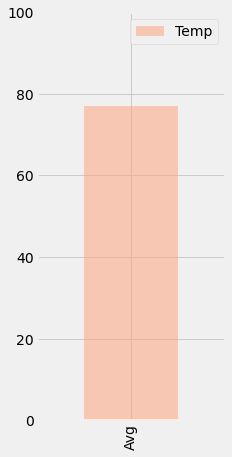

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [94]:
# plot average temp as a bar plot with peak to peak

temp_df[1:2].plot(kind="bar", figsize=(3,7), ylim=(0,100), color="lightsalmon", alpha=0.5)
plt.show()